In [1]:
!pip install tensorflow tensorflow-hub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import tensorflow_hub as hub

use_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_embed = hub.load(use_url)


In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

train_path = "/content/drive/MyDrive/train.csv"
test_path = "/content/drive/MyDrive/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_text = train_df["text"].tolist()
train_labels = train_df["Y"].tolist()

test_text = test_df["text"].tolist()
test_labels = test_df["Y"].tolist()


Mounted at /content/drive


In [6]:
train_embed = use_embed(train_text)
test_embed = use_embed(test_text)


In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(train_embed, train_labels)

pred_labels = clf.predict(test_embed)

acc = sum([1 for i in range(len(test_labels)) if test_labels[i] == pred_labels[i]]) / len(test_labels)
print("Accuracy: ", acc)


Accuracy:  0.8044491031912415


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# calculate accuracy
acc = accuracy_score(test_labels, pred_labels)

# calculate precision
precision = precision_score(test_labels, pred_labels)

# calculate recall
recall = recall_score(test_labels, pred_labels)

# calculate F1 score
f1 = f1_score(test_labels, pred_labels)

# calculate AUC-ROC score
auc_roc = roc_auc_score(test_labels, clf.predict_proba(test_embed)[:, 1])

print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)
print("AUC-ROC: ", auc_roc)


Accuracy:  0.8044491031912415
Precision:  0.7960542540073983
Recall:  0.7911764705882353
F1 score:  0.7936078672403195
AUC-ROC:  0.8871452986432035


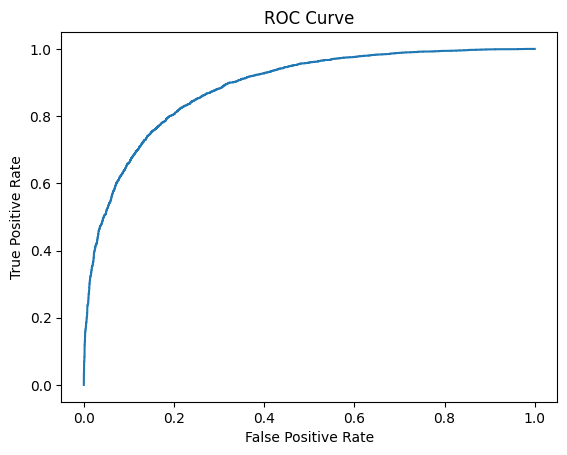

In [9]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, clf.predict_proba(test_embed)[:, 1])

# plot ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [13]:
# Sample input text
input_text = "Oh great, another meeting. Can't wait to sit in a room for two hours and talk about nothing."

# Clean the input text
clean_input_text = clean_text(input_text)

# Vectorize the cleaned input text using the USE model
input_embed = use_embed([clean_input_text])

# Make a prediction using the trained logistic regression model
prediction = clf.predict(input_embed)

# Convert prediction to human-readable form
if prediction[0] == 0:
  prediction_text = "not a sarcastic sentence"
else:
  prediction_text = "yes, it is a sarcastic sentence"

# Print the result in the desired format
print("Sentence: ", input_text)
print("Prediction: ", prediction_text)


Sentence:  Oh great, another meeting. Can't wait to sit in a room for two hours and talk about nothing.
Prediction:  yes, it is a sarcastic sentence


In [15]:
# Sample input text
input_text = "I just love waking up early on a Saturday to do yard work. It's definitely the highlight of my week."

# Clean the input text
clean_input_text = clean_text(input_text)

# Vectorize the cleaned input text using the USE model
input_embed = use_embed([clean_input_text])

# Make a prediction using the trained logistic regression model
prediction = clf.predict(input_embed)

# Convert prediction to human-readable form
if prediction[0] == 0:
  prediction_text = "not a sarcastic sentence"
else:
  prediction_text = "yes, it is a sarcastic sentence"

# Print the result in the desired format
print("Sentence: ", input_text)
print("Prediction: ", prediction_text)


Sentence:  I just love waking up early on a Saturday to do yard work. It's definitely the highlight of my week.
Prediction:  yes, it is a sarcastic sentence


In [17]:
# Sample input text
input_text = "Thanks for pointing out that mistake I made on that report. I didn't want to have any free time today anyway."

# Clean the input text
clean_input_text = clean_text(input_text)

# Vectorize the cleaned input text using the USE model
input_embed = use_embed([clean_input_text])

# Make a prediction using the trained logistic regression model
prediction = clf.predict(input_embed)

# Convert prediction to human-readable form
if prediction[0] == 0:
  prediction_text = "not a sarcastic sentence"
else:
  prediction_text = "yes, it is a sarcastic sentence"

# Print the result in the desired format
print("Sentence: ", input_text)
print("Prediction: ", prediction_text)

Sentence:  Thanks for pointing out that mistake I made on that report. I didn't want to have any free time today anyway.
Prediction:  yes, it is a sarcastic sentence
